# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Obtain Data

Read csv file with iris data into pandas

In [2]:
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Pedal Width', 'Class']
df = pd.read_csv('Data/iris.data', names=columns)
df.head()

,Sepal Length,Sepal Width,Petal Length,Pedal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Scrub Data

Perform df.info() overview to see what scrubbing needed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Pedal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Label encode iris class to numerical classes

In [4]:
df['Class'] = df['Class'].astype('category')
df['Class'] = df['Class'].cat.codes
df.head()

,Sepal Length,Sepal Width,Petal Length,Pedal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Perform df.info() to confirm dataset is scrubbed

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Pedal Width     150 non-null float64
Class           150 non-null int8
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


# Explore Dataset

Calculate dataset shape

In [6]:
df.shape

(150, 5)

Calculate class distribution

In [7]:
df['Class'].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

Plot class distribution

Text(0.5, 1.0, 'Iris Class Distribution')

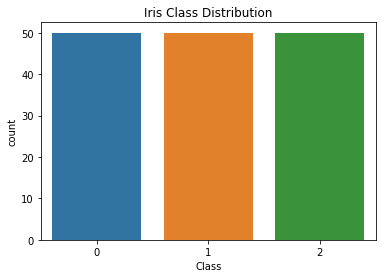

In [8]:
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df)
ax.set_title('Iris Class Distribution')

Calculate descriptive statistics for features

In [9]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Pedal Width,Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Plot feature distributions

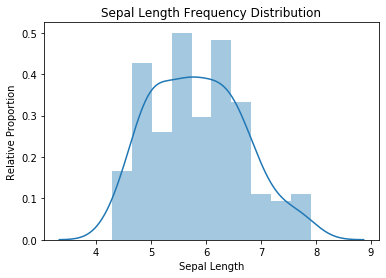

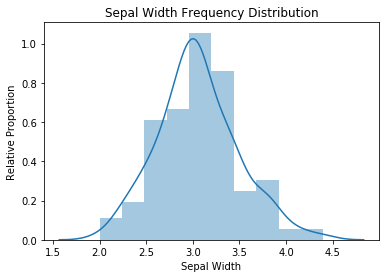

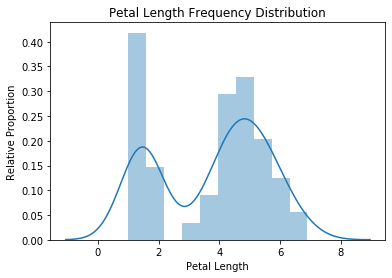

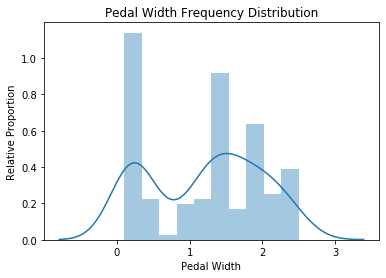

In [10]:
features = list(df.columns)
features.remove('Class')
for feature in features:
    fig, ax = plt.subplots()
    sns.distplot(df[feature], bins=10)
    ax.set_ylabel('Relative Proportion')
    ax.set_title(f'{feature} Frequency Distribution')

Fit tsne representation of Iris dataset

In [11]:
tsne_df = df.drop(columns='Class')
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1500)
tsne_output = tsne.fit_transform(tsne_df)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])
tsne_df.head()

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.447751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.828629
[t-SNE] KL divergence after 1100 iterations: 0.150723


,d1,d2
0,22.822519,15.560644
1,26.476976,16.769777
2,26.148331,15.225720
3,26.694778,15.618419
4,22.777727,15.054402


Plot t-sne representation of dataset

Text(0.5, 1.0, 'Iris Classification t-sne Plot')

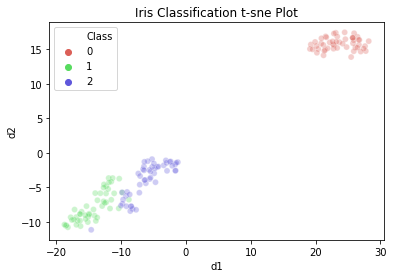

In [12]:
fig, ax = plt.subplots()
sns.scatterplot(
    x="d1", y="d2",
    hue=df['Class'],
    palette=sns.color_palette("hls", 3),
    data=tsne_df,
    legend="full",
    alpha=0.3, 
    ax=ax)
ax.set_title('Iris Classification t-sne Plot')

# Model Data

Create x and y variables from iris dataset

In [13]:
x = df.drop(columns='Class')
y = df['Class']

Perform Train Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=38)

Standardize Data

In [15]:
ss = StandardScaler()
ss.fit(x_train)
x_train = pd.DataFrame(ss.transform(x_train), columns=x.columns)
x_test =  pd.DataFrame(ss.transform(x_test), columns=x.columns)

Build dummy classifier model

In [16]:
dc = DummyClassifier(random_state = 23)
dc.fit(x_train, y_train)
y_train_pred_dc = dc.predict(x_train)
y_test_pred_dc = dc.predict(x_test)
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_dc))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred_dc))

Training Accuracy:  0.3392857142857143
Test Accuracy:  0.2894736842105263


/Users/blantj/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Gridsearch KNN model

In [17]:
knn_gs_params = {'n_neighbors': range(1,11), 'weights': ['uniform', 'distance']}
knn_gs_model = KNeighborsClassifier()
knn_gs = GridSearchCV(knn_gs_model, knn_gs_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
knn_gs.fit(x_train, y_train)
print(knn_gs.best_estimator_)
print(knn_gs.best_params_)
print(knn_gs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
{'n_neighbors': 3, 'weights': 'uniform'}
0.9648221343873518


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


Validate best knn model

In [18]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(x_train, y_train)
y_train_pred_knn = knn.predict(x_train)
y_test_pred_knn = knn.predict(x_test)
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_knn))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred_knn))

Training Accuracy:  0.9732142857142857
Test Accuracy:  0.9473684210526315


Gridsearch adaboost model

In [19]:
ab_gs_params = {'learning_rate': [x/100 for x in range(90,111)], 'n_estimators': [50, 100, 200]}
ab_gs_model = AdaBoostClassifier()
ab_gs = GridSearchCV(ab_gs_model, ab_gs_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
ab_gs.fit(x_train, y_train)
print(ab_gs.best_estimator_)
print(ab_gs.best_params_)
print(ab_gs.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.4s


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.02,
                   n_estimators=100, random_state=None)
{'learning_rate': 1.02, 'n_estimators': 100}
0.9648221343873518


[Parallel(n_jobs=-1)]: Done 315 out of 315 | elapsed:   41.7s finished


Validate best adaboost model

In [20]:
ab = AdaBoostClassifier(learning_rate=1.02, n_estimators=100)
ab.fit(x_train, y_train)
y_train_pred_ab = ab.predict(x_train)
y_test_pred_ab = ab.predict(x_test)
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_ab))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred_ab))

Training Accuracy:  0.9553571428571429
Test Accuracy:  0.9473684210526315


Gridsearch SVM model

In [21]:
svc_gs_params = {'C': [x/100 for x in range(60,81)]}
svc_gs_model = SVC()
svc_gs = GridSearchCV(svc_gs_model, svc_gs_params, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
svc_gs.fit(x_train, y_train)
print(svc_gs.best_estimator_)
print(svc_gs.best_params_)
print(svc_gs.best_score_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


SVC(C=0.64, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
{'C': 0.64}
0.9470355731225297


[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.5s finished


Validate best svm model

In [22]:
svc = SVC(C=.76)
svc.fit(x_train, y_train)
y_train_pred_svc = svc.predict(x_train)
y_test_pred_svc = svc.predict(x_test)
print('Training Accuracy: ', accuracy_score(y_train, y_train_pred_svc))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred_svc))

Training Accuracy:  0.9642857142857143
Test Accuracy:  0.9473684210526315


# Analyze Results

Calculate adaboost feature importances

In [32]:
feature_importances_df = pd.DataFrame(ab.feature_importances_)
feature_importances_df.columns = ['Importances']
feature_importances_df['Features'] = x.columns
feature_importances_df.head()

,Importances,Features
0,0.26,Sepal Length
1,0.00,Sepal Width
2,0.49,Petal Length
3,0.25,Pedal Width


Plot feature importances

Text(0.5, 1.0, 'Iris Dataset Adaboost Model Feature Importances')

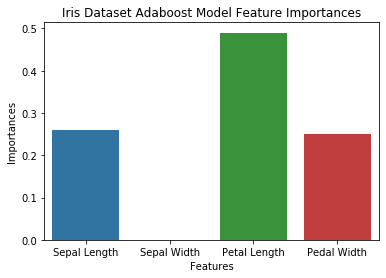

In [37]:
fig, ax = plt.subplots()
sns.barplot(x='Features', y='Importances', data=feature_importances_df)
ax.set_title('Iris Dataset Adaboost Model Feature Importances')